# 퍼스널 모빌리티 시장(전동 킥보드)
## - 트렌드 분석 및 문제인식

In [1]:
# 모듈 삽입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 폰트 관련 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = './Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

DIR = './Data/'

# (1) 구글 트렌드 '전동킥보드' 검색어 관심도 변화 분석

In [2]:
# 데이터 프레임 로딩
googleDF = pd.read_csv(DIR + '구글전동킥보드관심도변화(2016.1~2022.7).csv', header = 1)
googleDF.set_index('월')

,전동킥보드: (대한민국)
월,
2016-01,6
2016-02,4
2016-03,5
2016-04,11
2016-05,16
...,...
2022-03,34
2022-04,47
2022-05,60


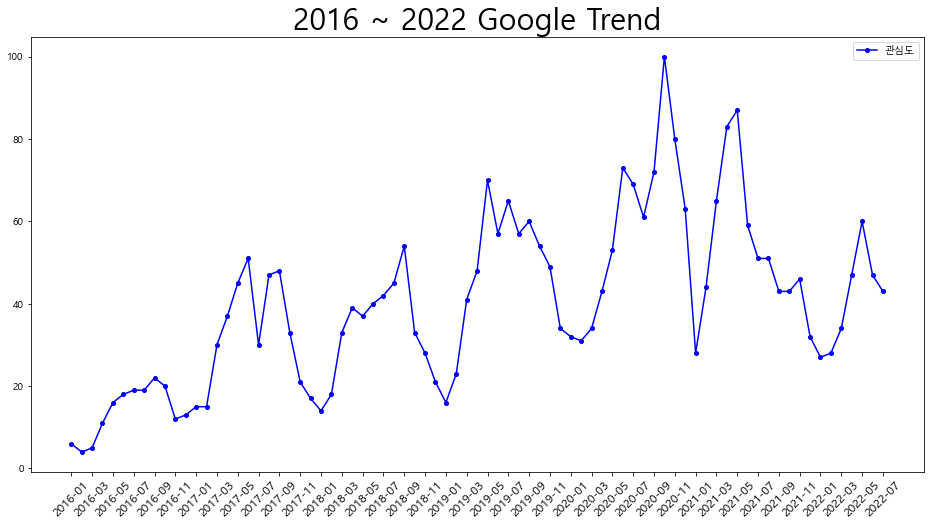

In [3]:
# 그래프 시각화
plt.figure(figsize=(16,8))
plt.plot(googleDF['월'].to_list(), googleDF['전동킥보드: (대한민국)'].to_list(), 'bo-', label='관심도', ms = 4)
plt.legend()
xlabels = ticks=googleDF['월'].apply(lambda x: x[:]).to_list()
plt.xticks(ticks=googleDF['월'].to_list(), labels=xlabels, rotation=45, fontdict={'fontsize': 12})
plt.locator_params(axis='x', nbins=len(xlabels)/2)
plt.title('2016 ~ 2022 Google Trend', fontdict={'fontsize': 30})
plt.show()

#### 출처 : 구글 트렌드

# 중간 분석
- 2017년 이후 꾸준한 관심도의 상승을 보여준다.
- 킥보드를 타기 힘든 날씨인 겨울이나 장마철에 관심도가 떨어지는 경향을 보임.

# (2) 전동 킥보드 이용 경험 분석(충남시 설문조사)
# (3) 공유 킥보드 결제량 증가(현대카드 결제 데이터) => 킥보드 사용 인구의 증가

In [4]:
# 데이터 프레임 로딩
ExperienceDF = pd.read_csv(DIR + '전동킥보드이용경험(2021년, 충북).csv', encoding='cp949', header = 1)
creditDF = pd.read_csv(DIR + '전동킥보드결제건수(현대카드).csv', encoding='cp949', header = 0)

In [5]:
# 항목별 데이터 분리
ExperienceDF_all = ExperienceDF[ExperienceDF['특성별(1)'].str.contains('전체')]
ExperienceDF_age = ExperienceDF[ExperienceDF['특성별(1)'].str.contains('연령별')]
ExperienceDF_job = ExperienceDF[ExperienceDF['특성별(1)'].str.contains('직업별')]

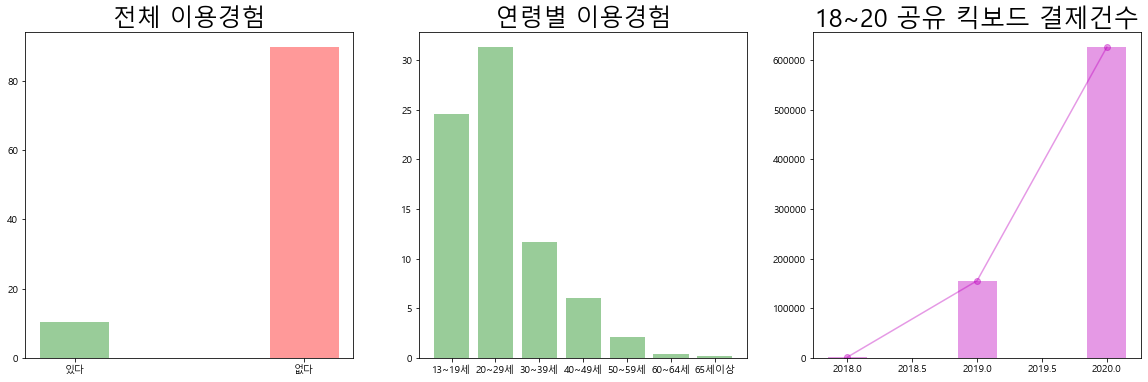

In [6]:
# 그래프로 시각화
f, axes = plt.subplots(1, 3)
f.set_size_inches((20, 6))
plt.subplots_adjust(wspace = 0.2)

axes[0].bar(['있다', '없다'], [ExperienceDF_all['있다'][0], ExperienceDF_all['없다'][0]], color = ['g', 'r'], alpha = 0.4, width = 0.3)
axes[0].set_title('전체 이용경험', fontsize = 24)
axes[1].bar(ExperienceDF_age['특성별(2)'].to_list(), ExperienceDF_age['있다'].to_list(), color = ['g'], alpha = 0.4)
axes[1].set_title('연령별 이용경험', fontsize = 24)
axes[2].plot(creditDF['년도'].to_list(), creditDF['결제건수(현대카드)'].to_list(), 'mo-', ms = 6, alpha = 0.4)
axes[2].bar([2018, 2019, 2020], creditDF['결제건수(현대카드)'].to_list(),label='결제건수',  color = ['m'], alpha = 0.4, width = 0.3)
axes[2].set_title('18~20 공유 킥보드 결제건수', fontdict={'fontsize': 25})

plt.show()

#### 출처 : 이용경험 => 충남시 2021 설문조사 / 결제건수 => 현대카드 결제건수 통계

### 중간분석
### 전동 킥보드 이용 경험
- 전체 성별 및 연령의 이용경험은 10퍼센트로 다소 낮게 보일 수 있으나, 본인의 자가용이 있어서 평소에 킥보드를 탈 이유가 없거나, 킥보드를 타기가 힘든 노령 인구를 제외할 경우 많게는 33퍼센트가 넘는 이용경험을 보임.
- 자가용이 없거나 단거리 이동이 잦은 젊은 층을 대상으로 하는 마케팅 전략이 필요할 것으로 보임.  

### 공유 킥보드 이용자 수 증가
- 2018 ~ 2020년까지 공유 킥보드 결제량은 2018년 1288건, 2019년 15만 5216건, 2020년 62만 5866건으로 급상승했으며, 결제 금액은 13억원에 달한다.
- 젊은 인구들을 대상으로 사용량이 급증한 이유는 코로나19로 인한 사회적 거리두기 현상이 영향을 미친것으로 보임.
- 실제로 닐슨코리아의 조사에 따르면 2020년 3분기 대중교통 이용자는 10% 줄어든 반면 퍼스널 모빌리티의 이용자는 동기간 159% 증가함

# (4) 공유 킥보드 재이용 의향 및 이유

In [7]:
# 데이터 프레임 로딩
reuse_whyDF = pd.read_csv(DIR + '전동킥보드이용의향이유(2021년, 충북).csv', encoding='cp949', header = 1)
reuse_whyDF.drop('특성별(1)', inplace=True, axis=1)
reuseDF = pd.DataFrame({'재이용의사':['있다','없다','모르겠다'], '응답':[63.4,21.5,10]})

In [8]:
# 재이용 의사 데이터 분석 및 주 고객층의 연령인 13~39세의 재이용 이유 분석
reuseDF = reuseDF.set_index('재이용의사')
reuse_whyDF = reuse_whyDF.set_index('특성별(2)')
reuse_why_2DF = reuse_whyDF.loc[['13~19세','20~29세','30~39세']]
reuse_why_2DF.drop('기타',axis=1, inplace=True)

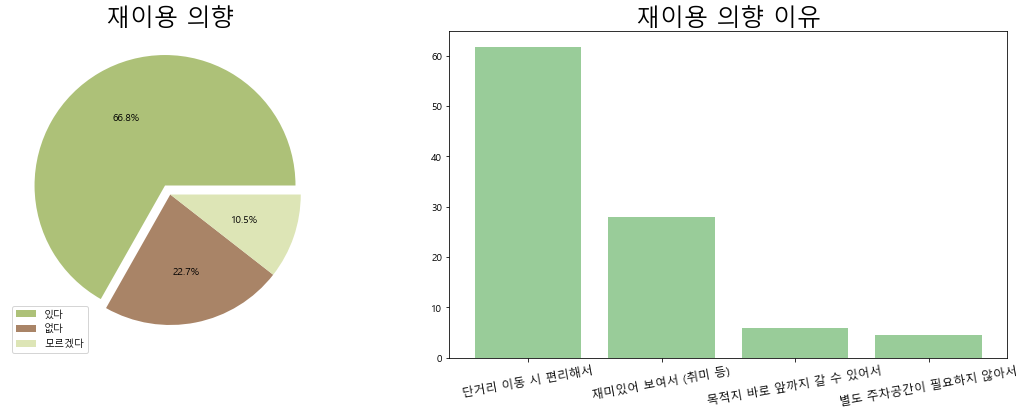

In [9]:
# 그래프로 시각화
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 6))
plt.subplots_adjust(wspace = 0)
colors = ["#adc178","#a98467","#dde5b6"]
exp = [0.08, 0, 0]
axes[0].pie(reuseDF['응답'],  autopct='%.1f%%', colors=colors, explode=exp)
axes[0].legend(reuseDF.index)
axes[0].set_title('재이용 의향', fontsize = 24)
axes[1].bar(reuse_why_2DF.columns.to_list(), reuse_why_2DF.mean().to_list(), color = ['g'], alpha = 0.4)
xlabels = ticks=reuse_why_2DF.columns.to_list()
plt.xticks(ticks=reuse_why_2DF.columns.to_list(), labels=xlabels, rotation=10, fontdict={'fontsize': 12})
axes[1].set_title('재이용 의향 이유', fontsize = 24)
plt.show()

#### 출처 : 엠브레인 통계자료

# 중간분석
- 재이용 의향이 있다는 응답은 66.8%로 높은 수준이었음. 
- 이유로는 단거리 이동이 편리해서가 61%로 가장 높았고, 재미있어 보여서가 28%로 뒤를 이었다.

# (5) 재이용 의향 없음의 이유 및 개선사항 분석

In [10]:
# 데이터 프레임 로딩
nouse_whyDF = pd.read_csv(DIR + '전동킥보드비이용이유(2021년, 충북).csv', encoding='cp949', header = 1)
nouse_whyDF.drop('특성별(1)', inplace=True, axis=1)
improveDF = pd.read_csv(DIR + '전동킥보드개선사항(2021년, 충북).csv', encoding='cp949', header = 1)
improveDF.drop('특성별(1)', inplace=True, axis=1)

In [11]:
# 주 고객층 연령 분리
nouse_whyDF = nouse_whyDF.set_index('특성별(2)')
nouse_why_2DF = nouse_whyDF.loc[['13~19세','20~29세','30~39세']]
# 전체 연령 분리
improveDF = improveDF.set_index('특성별(2)')
improve_ageDF = improveDF[improveDF.index.str.contains('세')]
improve_ageDF.rename(columns={'안전한 이용을 위한 지도 단속(안전모 미착용 2인탑승 보도 주행 등)':'안전한 이용을 위한 지도 단속'}, inplace=True)

C:\Users\kry11\AppData\Local\Temp\ipykernel_5536\707695972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_ageDF.rename(columns={'안전한 이용을 위한 지도 단속(안전모 미착용 2인탑승 보도 주행 등)':'안전한 이용을 위한 지도 단속'}, inplace=True)


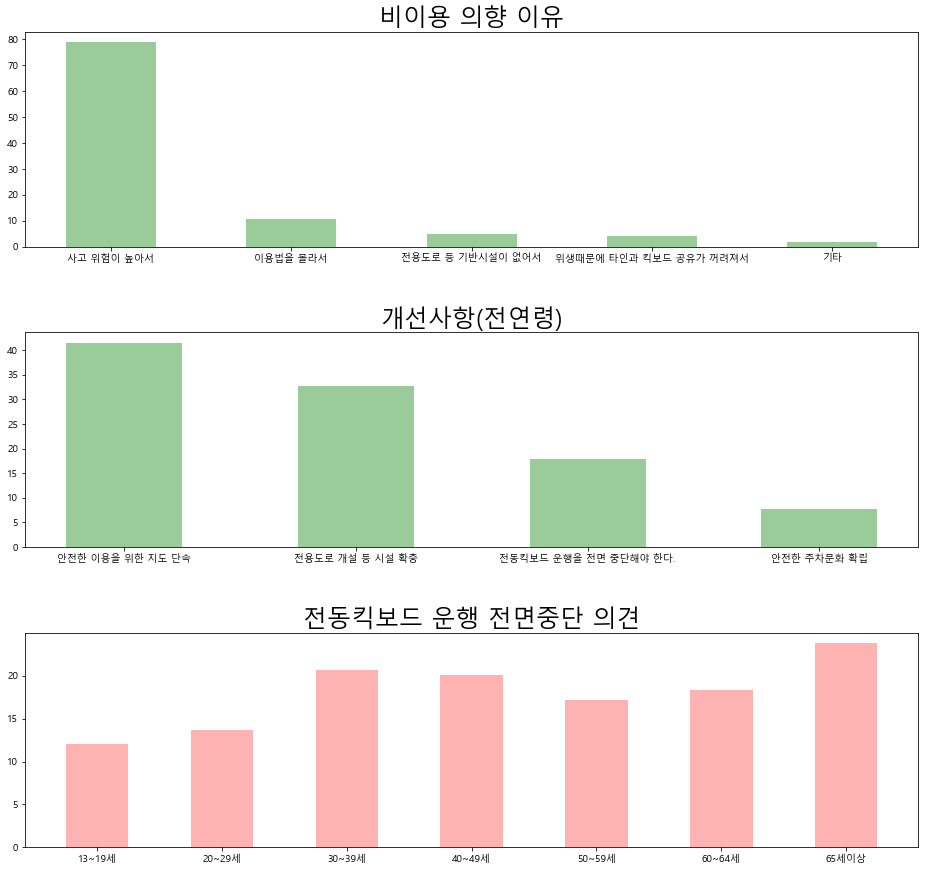

In [57]:
# 그래프로 시각화
f, axes = plt.subplots(3, 1)
f.set_size_inches((16, 15))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(3,1,1)
plt.bar(nouse_why_2DF.columns.to_list(), nouse_why_2DF.mean().to_list(), color = ['g'], alpha = 0.4, width = 0.5)
plt.title('비이용 의향 이유', fontsize = 24)

plt.subplot(3,1,2)
plt.bar(improve_ageDF.columns.to_list(), improve_ageDF.mean().to_list(), color = ['g'], alpha = 0.4, width = 0.5)
plt.title('개선사항(전연령)', fontsize = 24)

plt.subplot(3,1,3)
plt.bar(improve_ageDF.index.to_list(), improve_ageDF['전동킥보드 운행을 전면 중단해야 한다.'].to_list(), color = ['r'], alpha = 0.3, width = 0.5)
plt.title('전동킥보드 운행 전면중단 의견', fontsize = 24)

plt.show()

#### 출처 : 엠브레인 통계자료

# 중간분석
- '킥보드를 재이용하지 않겠다'라고 응답한 이유로 사고 위험이 높아서, 이용법을 몰라서, 전용도로가 없어서, 위생때문에 등 여러 의견이 있었지만 사고 위험이 높아서 다시 이용하지 않겠다가 압도적으로 높은 비율을 차지했음.
- 이를 반증하듯 공용 킥보드 개선사항으로 안전을 위한 지도단속이 가장 높은 비율을 차지했고, 특이한 점으로 '전동킥보드 운행을 전면 중단해야 한다'와 같은 부정적인 의견이 발견되었음.
- 이와같은 답변을 한 응답자에 대해 연령별로 분석을 해보았을때, 운전자의 비율이 낮은 10대, 20대 보다는 운전자의 비율이 높은 30대 이상의 나이대에서 높은 응답률을 보임.
- 즉, 운전자들의 시선에서 킥보드 이용자들에 대한 부정적인 인식이 강하다고 볼 수 있음.

# (6) 부정적 인식의 원인 분석

In [13]:
# 데이터 프레임 로딩
whyDF = pd.read_csv(DIR + '전동킥보드안전실태조사(2021, 한국소비자원).csv', encoding='cp949', header = 1).set_index('분류')
whyDF.drop('계', axis=1, inplace=True)

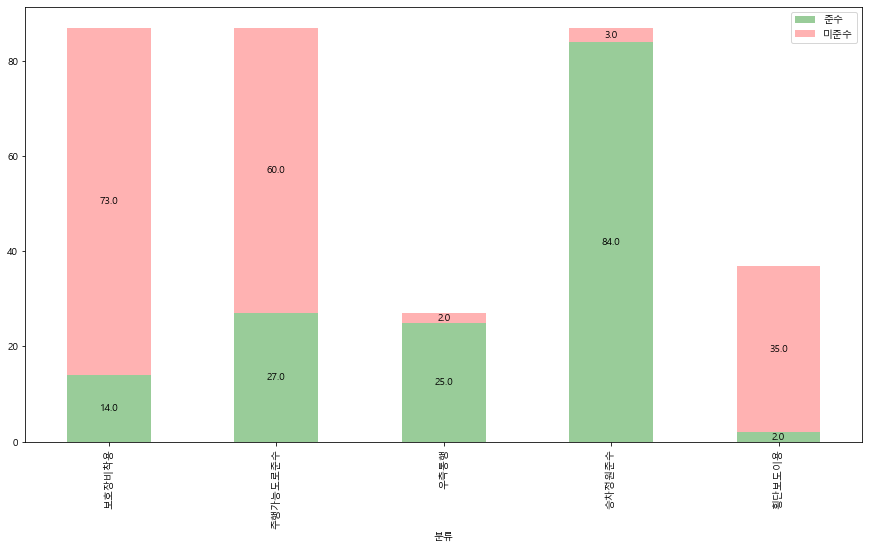

In [14]:
# 그래프 시각화
colors = ["#99CC99","#FFB2B2"]
why_graph = whyDF.plot(kind="bar",stacked=True,figsize=(15,8), color=colors)
for c in why_graph.containers:
    labels = [ x.get_height() for x in c ]
    why_graph.bar_label(c, labels=labels, label_type='center')
plt.show()

#### 출처 : 한국소비자원 2021 전동킥보드 공유서비스 안전실태조사

# 중간분석
- 한국소비자원이 서울시 10개소를 대상으로 실시한 조사에 따르면 보호장비착용, 주행가능도로 준수의 경우 둘다 높은 비율으로 안전사항을 준수하지 않는것으로 나타났고, 주행가능 도로를 준수하는 경우에도 우측통행을 하지않는 사용자도 발견할 수 있었음.
- 승차정원준수의 경우 승차정원인 1명을 넘어서 여럿이서 킥보드를 타는 경우도 발견되었고, 횡단보도이용의 경우 원칙상 킥보드에서 내려 도보로 이동하여야 하지만 도보로 이동하는 인원은 37명중 2명밖에 되지않았음.
- 즉, 이러한 안전수칙의 미준수로 킥보드가 도로교통 및 통행에 많은 지장을 주고 있었음을 확인할 수 있었고, 부정적 인식은 킥보드 이용자가 스스로 만들어낸 결과라고 할 수 있음.